# 102190061 - Ly Thanh Hai

# Bai Tap 1


In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from tabulate import tabulate

In [40]:
data = pd.read_csv('../State/Titanic/titanic.csv')
data.drop(columns=["sex", "embarked", 'class', 'who', 'adult_male', "deck", "embark_town", "alive", "alone"], inplace=True)
data.head()

,survived,pclass,age,sibsp,parch,fare
0,0,3,22.0,1,0,7.2500
1,1,1,38.0,1,0,71.2833
2,1,3,26.0,0,0,7.9250
3,1,1,35.0,1,0,53.1000
4,0,3,35.0,0,0,8.0500


In [41]:
data.isnull().sum()

survived      0
pclass        0
age         177
sibsp         0
parch         0
fare          0
dtype: int64

# 1. BT 5.1

- 7 Ky thuat lam sach du lieu

1. Mean

In [42]:
def meanFunction(data):
    data1 = data.copy()
    data1['age'].fillna(data1['age'].mean(), inplace=True)
    # data1['age'].isna().sum()
    return data1

2. Median

In [43]:
def medianFunction(data):
    data2 = data.copy()
    data2['age'].fillna(data2['age'].median(), inplace=True)
    # data2['age'].isna().sum()
    return data2

3. Mode imputation

In [44]:
def modeFunction(data):
    data3 = data.copy()
    data3['age'].fillna(data3['age'].mode()[0], inplace=True)
    # data3['age'].isna().sum()
    return data3
# data3.tail()
# print(data3['age'].mode())

4. Random

In [45]:
def randomFunction(data):
    data4 = data.copy()
    data4['age'].dropna().sample()
    random_samples = data4['age'].dropna().sample(n=data4['age'].isnull().sum(), random_state=0)
    # random_samples
    random_samples.index = data4[data4['age'].isnull()].index
    # print(random_samples.index)
    data4['age_random'] = data4['age']
    data4.loc[data4['age'].isnull(), 'age_random'] = random_samples
    data4['age'] = data4['age_random']
    del data4['age_random']
    # data4['age'].isna().sum()
    return data4

5. End of Dist

In [46]:
def endOfDistFunction(data):
    data5 = data.copy()
    # data5.age.hist(bins=50)
    extreme = data5.age.mean() + 3 * data5.age.std()
    extreme
    def impute_nan(df,variable,median,extreme):
        df[variable+"_end_dist"] = df[variable].fillna(extreme)
        df[variable].fillna(median, inplace=True)
    impute_nan(data5,'age', data5.age.median(), extreme)
    # data5['age'].isna().sum()
    return data5


6. Arbitrary values

In [47]:
def arbitraryFunction(data):
    data6 = data.copy()
    def impute_nan(df,variable):
        df[variable+'_zero'] = df[variable].fillna(0)
        df[variable+'_hundred'] = df[variable].fillna(100)
    random = np.random.randint(0, 100)
    data6['age'].fillna(random, inplace=True)
    # impute_nan(data6, 'age')
    # data6.tail()
    return data6
# data6['age'].isna().sum()

7. New Feature


In [48]:
def newFeatureFunction(data):
    data7 = data.copy()
    data7['age_NAN']=np.where(data7['age'].isnull(),1,0)
    data7['age'].fillna(data7.age.median(), inplace=True)
    # data7['age'].isna().sum()
    # data7.tail()
    return data7

- Xu ly du lieu ngoai le cho du lieu

8. Outliers

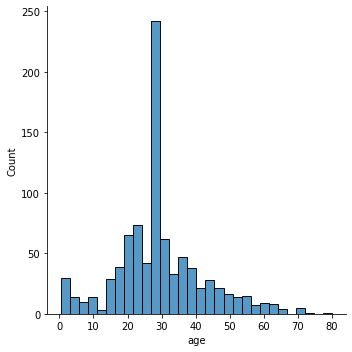

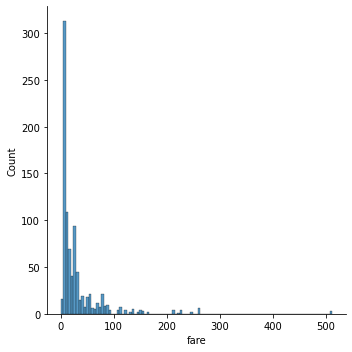

In [49]:
def drawDistPlot(data):
    sns.displot(data= data["age"])
    plt.show()
    sns.displot(data= data["fare"])
    plt.show()

drawDistPlot(newFeatureFunction(data))


In [50]:
# age la phan bo chuan
#2 Xu ly du lieu ngoai le age
def removeOutliersAge(df):
    average = np.average(df["age"])
    std = np.std(df["age"])
    sideTop = average + 3 * std
    sideBot = average - 3 * std
    arrayAge = []
    for i in range(0, len(df["age"])):
        if df["age"][i] < sideBot:
            arrayAge.append(sideBot)
        elif df["age"][i] > sideTop:
            arrayAge.append(sideTop)
        else:
            arrayAge.append(df["age"][i])
    df["age"] = arrayAge  
    return df

# fare la phan bo lech
#3 Xu ly du lieu ngoai le fare
def removeOutliersFare(df):
    Q3 = np.quantile(df["fare"], 0.75)
    Q1 = np.quantile(df["fare"], 0.25)
    IQR = Q3 - Q1
    sideTop = Q3 + 3 * IQR
    sideBot = Q1 - 3 * IQR
    arrayFare = []
    for i in range(0, len(df["fare"])):
        if df["fare"][i] < sideBot:
            arrayFare.append(sideBot)
        elif df["fare"][i] > sideTop:
            arrayFare.append(sideTop)
        else:
            arrayFare.append( df["fare"][i])
    df["fare"] = arrayFare
    return df

# def combine(df1):
#     removeOutliersAge(df1)
#     removeOutliersFare(df1)

# removeOutliersAge(newFeatureFunction(data))
# removeOutliersFare(newFeatureFunction(data))
# drawDistPlot(newFeatureFunction(data))


- Trien khai hoi quy logistic

9. Logistic regression implementation

In [51]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

def myLogisticRegression(df):
    X = df[["age", 'fare']]
    y = df['survived']
    array = []
    for i in range(0, 10):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = i)
        logmodel = LogisticRegression()
        logmodel.fit(X_train, y_train)
        predictions = logmodel.predict(X_test)
        # print(classification_report(y_test, predictions))
        Accuracy_Score = accuracy_score(y_test, predictions)
        # print(Accuracy_Score)
        array.append(Accuracy_Score)
    
    return np.mean(array)


mean_nonOut = myLogisticRegression(meanFunction(data))
mean_Out = myLogisticRegression(removeOutliersAge(removeOutliersFare(meanFunction(data))))
median_nonOut = myLogisticRegression(medianFunction(data))
median_Out = myLogisticRegression(removeOutliersAge(removeOutliersFare(medianFunction(data))))
mode_nonOut = myLogisticRegression(modeFunction(data))
mode_Out = myLogisticRegression(removeOutliersAge(removeOutliersFare(modeFunction(data))))
random_nonOut = myLogisticRegression(randomFunction(data))
random_Out = myLogisticRegression(removeOutliersAge(removeOutliersFare(randomFunction(data))))
endOfDist_nonOut = myLogisticRegression(endOfDistFunction(data))
endOfDist_Out = myLogisticRegression(removeOutliersAge(removeOutliersFare(endOfDistFunction(data))))
arbitrary_nonOut = myLogisticRegression(arbitraryFunction(data))
arbitrary_Out = myLogisticRegression(removeOutliersAge(removeOutliersFare(arbitraryFunction(data))))
newFeature_nonOut = myLogisticRegression(newFeatureFunction(data))
newFeature_Out = myLogisticRegression(removeOutliersAge(removeOutliersFare(newFeatureFunction(data))))
# print(mean_nonOut, mean_Out, sep="  ")
# print(median_nonOut, median_Out, sep="  ")
# print(mode_nonOut, mode_Out, sep="  ")
# print(random_nonOut, random_nonOut, sep="  ")
# print(endOfDist_nonOut, endOfDist_Out, sep="  ")
# print(newFeature_nonOut, newFeature_Out, sep="  ")
mydata = [
    ["non_normalization", mean_nonOut, median_nonOut, mode_nonOut, random_nonOut, endOfDist_nonOut, arbitrary_nonOut, newFeature_nonOut],
    ["nomalization", mean_Out, median_Out, mode_Out, random_Out, endOfDist_Out, arbitrary_Out, newFeature_Out],
]

head = ["", "mean", "median", "mode", "random", "endOfDist", "arbitrary", "newFeature"]

print("Table about accuracy of group normalization and 7 technology data cleaning: ")
print(tabulate(mydata, headers=head, tablefmt="grid"))

Table about accuracy of group normalization and 7 technology data cleaning: 
+-------------------+----------+----------+----------+----------+-------------+-------------+--------------+
|                   |     mean |   median |     mode |   random |   endOfDist |   arbitrary |   newFeature |
+===================+==========+==========+==========+==========+=============+=============+==============+
| non_normalization | 0.65322  | 0.652881 | 0.652881 | 0.652203 |    0.652881 |    0.661695 |     0.652881 |
+-------------------+----------+----------+----------+----------+-------------+-------------+--------------+
| nomalization      | 0.668475 | 0.667797 | 0.667797 | 0.66678  |    0.667797 |    0.66339  |     0.667797 |
+-------------------+----------+----------+----------+----------+-------------+-------------+--------------+


# 2. BT 5.2

- Cac ky thuat chuan hoa du lieu

1. z-score


In [52]:
from sklearn.preprocessing import StandardScaler

def zScoreNormalization(data):
    scaler = StandardScaler()
    df_scaled = pd.DataFrame(scaler.fit_transform(data), columns = data.columns)
    return df_scaled

2. min-max


In [53]:
from sklearn.preprocessing import MinMaxScaler

def minMaxNormalization(data):
    min_max = MinMaxScaler()
    df_minmax = pd.DataFrame(min_max.fit_transform(data), columns = data.columns)
    return df_minmax

3. Robust-outliers


In [54]:
from sklearn.preprocessing import RobustScaler

def robustOuliersNormalization(data):
    scaler = RobustScaler()
    df_robust_scaler = pd.DataFrame(scaler.fit_transform(data), columns = data.columns)
    return df_robust_scaler

4. SQRT

In [55]:
def sqrtNormalization(data):
    data1 = data.apply(np.sqrt)
    return data1

5. Inverse

In [56]:
def invNormalization(data):
    data1 = data.copy()
    array = []
    for i in range(0, len(data1["age"])):
       array.append(1 / data1["age"][i])
    data1["age"] = array
    array1 = []
    for i in range(0, len(data1["age"])):
       array1.append(1 / data1["fare"][i])
    data1["fare"] = array1
    return data1

6. Caculator Improve Accuracy

In [57]:
# zScore = myLogisticRegression(removeOutliersAge(removeOutliersFare(zScoreNormalization(medianFunction(data)))))
minMax = myLogisticRegression(removeOutliersAge(removeOutliersFare(minMaxNormalization(medianFunction(data)))))
robustOutliers = myLogisticRegression(removeOutliersAge(removeOutliersFare(robustOuliersNormalization(medianFunction(data)))))
sqrt = myLogisticRegression(removeOutliersAge(removeOutliersFare(sqrtNormalization(medianFunction(data)))))
inv = myLogisticRegression(removeOutliersAge(removeOutliersFare(invNormalization(medianFunction(data)))))
print(minMax, robustOutliers, sqrt, inv, sep=" ")
print("Percentage improve: ")
print(f"minMax is increase: {((minMax - median_Out) / median_Out) * 100}%")
print(f"robustOutliers is increase: {((robustOutliers - median_Out) / median_Out) * 100}%")
print(f"sqrt is increase: {((sqrt - median_Out) / median_Out) * 100}%")
print(f"inv is increase: {((inv - median_Out) / median_Out) * 100}%")


0.6345762711864408 0.668135593220339 0.6694915254237288 0.6223728813559323
Percentage improve: 
minMax is increase: -4.974619289340089%
robustOutliers is increase: 0.050761421319796156%
sqrt is increase: 0.25380710659898076%
inv is increase: -6.802030456852784%


/tmp/ipykernel_5871/4262837399.py:9: RuntimeWarning: divide by zero encountered in double_scalars
  array1.append(1 / data1["fare"][i])


Vay sqrt co ti le cai thien cao nhat trong cac ky thuat chuan hoa và tang 0.25%